In [1]:
import tensorflow as tf

In [27]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
turbines= pd.read_csv('gas_turbines.csv')

In [4]:
turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
turbines.shape

(15039, 11)

In [7]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
AT      15039 non-null float64
AP      15039 non-null float64
AH      15039 non-null float64
AFDP    15039 non-null float64
GTEP    15039 non-null float64
TIT     15039 non-null float64
TAT     15039 non-null float64
TEY     15039 non-null float64
CDP     15039 non-null float64
CO      15039 non-null float64
NOX     15039 non-null float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [9]:
turbines= turbines[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX', 'TEY']]

In [11]:
turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [12]:
import matplotlib.pyplot as plt

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <a list of 10 Patch objects>)

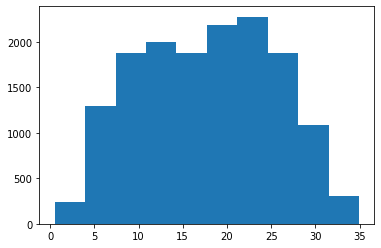

In [13]:
plt.hist(turbines['AT'])

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <a list of 10 Patch objects>)

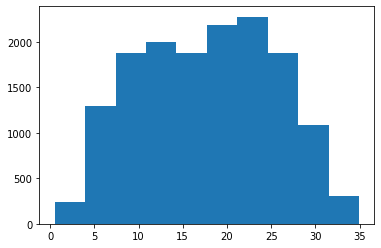

In [14]:
plt.hist(turbines['AT'])

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <a list of 10 Patch objects>)

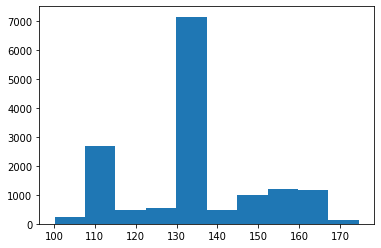

In [15]:
plt.hist(turbines['TEY'])

In [16]:
turb_array= turbines.values

In [17]:
X= turb_array[:,0:10]
Y= turb_array[:,10]

In [18]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [19]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,-1.169680e-15,-1.925280e-14,2.007245e-16,3.810001e-16,1.111478e-16,-2.324212e-15,1.744899e-15,2.542166e-16,1.959261e-17,-3.646853e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [20]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score

In [21]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [22]:
model = KerasRegressor(build_fn = create_model,verbose = 0)

In [23]:
batch_size = [10,20]
epochs = [10,50]
learning_rate = [0.01,0.1]
dropout_rate = [0.0,0.1]
activation_function = ['relu','linear']
init = ['uniform']
neuron1 = [4,8]
neuron2 = [2,4]

In [24]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [30]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5; 1/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=16230.499 total time=   6.1s
[CV 2/5; 1/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=4454832640.000 total time=   6.1s
[CV 3/5; 1/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neu

[CV 5/5; 5/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=156958.188 total time=   6.4s
[CV 1/5; 6/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 6/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=12000188956672.000 total time=   7.1s
[CV 2/5; 6/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 6/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=5682159943680.000 total time=   7.3s
[CV 3/5; 6/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[

[CV 5/5; 10/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=78476.109 total time=  28.8s
[CV 1/5; 11/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 11/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=623177170944.000 total time=  28.4s
[CV 2/5; 11/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 11/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=605263233024.000 total time=  28.4s
[CV 3/5; 11/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neu

[CV 5/5; 15/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=701055901892608.000 total time=  29.6s
[CV 1/5; 16/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 16/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=1357807873949696.000 total time=  29.5s
[CV 2/5; 16/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 16/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=527821583679488.000 total time=  28.5s
[CV 3/5; 16/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neu

[CV 5/5; 20/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=18580029440.000 total time=   6.4s
[CV 1/5; 21/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 21/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=4547724443648.000 total time=   6.3s
[CV 2/5; 21/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 21/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=3198057447424.000 total time=   6.2s
[CV 3/5; 21/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, 

[CV 5/5; 25/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=324133748736.000 total time=  30.5s
[CV 1/5; 26/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 26/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=948902559744.000 total time=  29.3s
[CV 2/5; 26/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 26/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=374592897024.000 total time= 1.5min
[CV 3/5; 26/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1

[CV 5/5; 30/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=319016413429760.000 total time= 1.0min
[CV 1/5; 31/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 31/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=811585.938 total time= 1.4min
[CV 2/5; 31/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 31/128] END activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=459873892433920.000 total time= 1.4min
[CV 3/5; 31/128] START activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, ne

[CV 5/5; 35/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=2108367488.000 total time=   8.7s
[CV 1/5; 36/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 36/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=3823475968.000 total time=   9.2s
[CV 2/5; 36/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 36/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=1265219072.000 total time=   8.5s
[CV 3/5; 36/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, ne

[CV 5/5; 40/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=6271911067648.000 total time=   9.2s
[CV 1/5; 41/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 41/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=60409606144.000 total time=  40.9s
[CV 2/5; 41/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 41/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=38781.230 total time=  40.7s
[CV 3/5; 41/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neur

[CV 5/5; 45/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=61419294818304.000 total time=  39.3s
[CV 1/5; 46/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 46/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=67250971213824.000 total time=  38.9s
[CV 2/5; 46/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 46/128] END activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=46496997179392.000 total time=  40.1s
[CV 3/5; 46/128] START activation_function=relu, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1

[CV 5/5; 50/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=3022340864.000 total time=   9.2s
[CV 1/5; 51/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 51/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=3663675648.000 total time=   8.9s
[CV 2/5; 51/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 51/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=681086656.000 total time=   8.4s
[CV 3/5; 51/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neu

[CV 5/5; 55/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=1945675890688.000 total time=   9.4s
[CV 1/5; 56/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 56/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=4625635737600.000 total time=   9.2s
[CV 2/5; 56/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 56/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=2062575075328.000 total time=   9.6s
[CV 3/5; 56/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8,

[CV 5/5; 60/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=229985239040.000 total time=  14.8s
[CV 1/5; 61/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 61/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=121243638431744.000 total time=  14.4s
[CV 2/5; 61/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 61/128] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=27628381667328.000 total time=  15.3s
[CV 3/5; 61/128] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1

[CV 5/5; 65/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=2953128704.000 total time=   6.2s
[CV 1/5; 66/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 66/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=2455213824.000 total time=   6.1s
[CV 2/5; 66/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 66/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2057751680.000 total time=   6.0s
[CV 3/5; 66/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, 

[CV 5/5; 70/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=5915985051648.000 total time=   6.2s
[CV 1/5; 71/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 71/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=2477949976576.000 total time=   6.0s
[CV 2/5; 71/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 71/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2092243091456.000 total time=   6.1s
[CV 3/5; 71/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.

[CV 4/5; 75/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=535411556352.000 total time=  27.3s
[CV 5/5; 75/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 75/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=404464566272.000 total time=  27.5s
[CV 1/5; 76/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 76/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=340825407488.000 total time=  27.0s
[CV 2/5; 76/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0

[CV 3/5; 80/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=338466239938560.000 total time=  26.9s
[CV 4/5; 80/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 80/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=1069368272224256.000 total time=  27.2s
[CV 5/5; 80/128] START activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 80/128] END activation_function=linear, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=808825355501568.000 total time=  28.3s
[CV 1/5; 81/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_r

[CV 3/5; 85/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=1374380097536.000 total time=   6.4s
[CV 4/5; 85/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 85/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=3809202929664.000 total time=   6.3s
[CV 5/5; 85/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 85/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=2890975150080.000 total time=   6.1s
[CV 1/5; 86/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1

[CV 2/5; 90/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-107853258752.000 total time=  28.2s
[CV 3/5; 90/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 90/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=179473432576.000 total time=  27.9s
[CV 4/5; 90/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 90/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=516192731136.000 total time=  28.1s
[CV 5/5; 90/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=

[CV 1/5; 95/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=187892924153856.000 total time=  27.8s
[CV 2/5; 95/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 95/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-103196949217280.000 total time=  27.9s
[CV 3/5; 95/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 95/128] END activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=185244556722176.000 total time=  28.4s
[CV 4/5; 95/128] START activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_r

[CV 1/5; 100/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=206351424.000 total time=   3.3s
[CV 2/5; 100/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 100/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-1709483392.000 total time=   3.3s
[CV 3/5; 100/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 100/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=330122976.000 total time=   3.3s
[CV 4/5; 100/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.

[CV 5/5; 104/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=2066965331968.000 total time=   3.4s
[CV 1/5; 105/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 105/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=2854225152.000 total time=  13.9s
[CV 2/5; 105/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 105/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-24870735872.000 total time=  13.6s
[CV 3/5; 105/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_ra

[CV 4/5; 109/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=41693311139840.000 total time=  14.0s
[CV 5/5; 109/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 109/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=29611821891584.000 total time=  13.9s
[CV 1/5; 110/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 110/128] END activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=6115703652352.000 total time=  13.7s
[CV 2/5; 110/128] START activation_function=linear, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_

[CV 3/5; 114/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=229211664.000 total time=   3.5s
[CV 4/5; 114/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 114/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1416274304.000 total time=   3.5s
[CV 5/5; 114/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 114/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1026988416.000 total time=   3.5s
[CV 1/5; 115/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.

[CV 2/5; 119/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-735663816704.000 total time=   3.5s
[CV 3/5; 119/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 119/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=215798054912.000 total time=   3.5s
[CV 4/5; 119/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 119/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=1435616018432.000 total time=   3.5s
[CV 5/5; 119/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rat

[CV 1/5; 124/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=19188199424.000 total time=  14.7s
[CV 2/5; 124/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 124/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-87712415744.000 total time=  14.5s
[CV 3/5; 124/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 124/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=24852004864.000 total time=  14.4s
[CV 4/5; 124/128] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_ra

[CV 5/5; 128/128] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=117678354202624.000 total time=  14.5s


In [31]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 1456660787547340.8, using {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'neuron1': 8, 'neuron2': 4}
2572940055.512305,2147515202.523279 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}
6309500239.97793,5786004458.8535795 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}
12208215091.2,5523910247.883088 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 2}
17022193356.8,7659367538.982332 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
2690996514578.7217,2269089616758.

In [32]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(8,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model1.add(Dropout(0.1))
    model1.add(Dense(4,kernel_initializer = 'uniform',activation = 'relu'))
    model1.add(Dropout(0.1))
    model1.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.1)
    model1.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model1

In [33]:
model1 = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

In [34]:
model1.fit(X_standardized,Y)

In [35]:
Y_predict = model1.predict(X_standardized)

In [36]:
Y_predict

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [40]:
rmse_value = np.sqrt(np.mean((Y_predict-Y)**2))
rmse_value

134.1258000120717

<function matplotlib.pyplot.show(*args, **kw)>

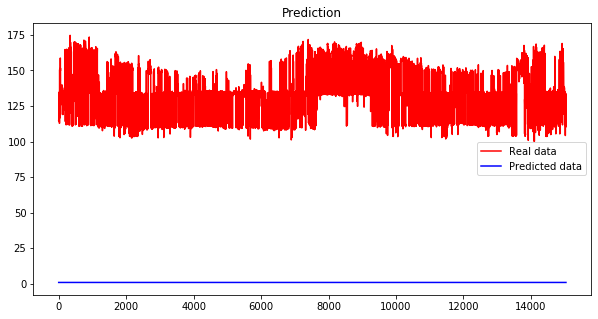

In [41]:
plt.figure(figsize=(10,5))
plt.plot(Y, color= 'red',label= 'Real data')
plt.plot(Y_predict, color='blue', label='Predicted data')
plt.title('Prediction')
plt.legend()
plt.show

In [42]:
np.corrcoef(Y_predict,Y)

array([[nan, nan],
       [nan,  1.]])